## Data
https://github.com/JcFreya/Adult-Census-Income

Data Information

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: final weight, continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Represents the responding unit’s role in the family. Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, 
Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Represents the responding unit’s role in the family. Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: income from investment sources, apart from wages/salary, continuous.

capital-loss: losses from investment sources, apart from wages/salary, continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Výstup:

Construct a model that accurately predicts whether an individual makes more than $50,000.
What are the key factors contributing to high vs. low income?
Are there any significant gaps in these Census attributes by gender or race?
Any underneath clusters (group) based on census data?

In [113]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

adults = pd.read_csv('adult.data', header=None, names=columns)

print(adults.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [114]:
# Kontrola nan hodnot
for i in adults.columns:
    print(f"Sloupec {i} | {adults[i].isna().sum()} z {adults.shape[0]}")

Sloupec age | 0 z 32561
Sloupec workclass | 0 z 32561
Sloupec fnlwgt | 0 z 32561
Sloupec education | 0 z 32561
Sloupec education-num | 0 z 32561
Sloupec marital-status | 0 z 32561
Sloupec occupation | 0 z 32561
Sloupec relationship | 0 z 32561
Sloupec race | 0 z 32561
Sloupec sex | 0 z 32561
Sloupec capital-gain | 0 z 32561
Sloupec capital-loss | 0 z 32561
Sloupec hours-per-week | 0 z 32561
Sloupec native-country | 0 z 32561
Sloupec income | 0 z 32561


In [115]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [116]:
#ty dtype objecty - mohou obsahovat něco podivného
object_col = adults.select_dtypes(include=object).columns.tolist()
#print(object_col)

for c in object_col:
    print("Col: ", c)
    print(adults[c].unique())
    print("\n")

Col:  workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Col:  education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Col:  marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Col:  occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


Col:  relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Col:  race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


Col:  sex
[' Male' ' Female']


Col:  

In [117]:
#poměr jednotlivých hodnot z pohledu oboru hodnot column
for c in object_col:
    print(adults[c].value_counts()/adults.shape[0],'\n')

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64 

education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64 

marital-status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: 

In [127]:
#v datech se nachází znak ? - je ho málo, takže jej vyhodim pomocí drop a filter
#adults = adults.replace(["?"], np.nan)
#adults = adults.dropna()

adults = adults.apply(lambda col: col.str.strip() if col.dtypes == "object" else col)

# nahradím "?" za NaN
adults = adults.replace("?", np.nan)

# drop NaN
adults = adults.dropna()

#for c in object_col:
#    print(adults[adults[c] == "?"])

print((adults == "?").sum().sum())   # počet zbývajících "?"


0


In [128]:
# Kouknu na outliery
print(adults.describe())

#zajímavé jsou sloupce capital-loss, capital-gain a fnlwgt - podívám se na ně později
#capital gain - má obrovskou směrodatnou odchylku - 75% hodnot jsou v rozsahu 0 
#capital loss - to samé
# zkontroluji importance těchto dimenzí a následně provedu standartizaci/škálování


                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    30162.000000  
mean        40.931238  
std         11.979984  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


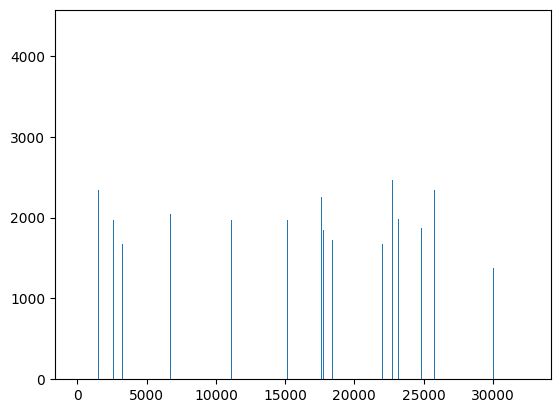

In [120]:
dummy_x = range(0,adults.shape[0])
plt.bar(dummy_x,adults["capital-loss"])
plt.show()

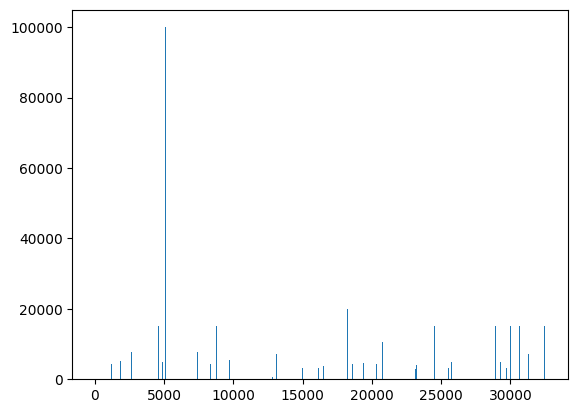

In [121]:
dummy_x = range(0,adults.shape[0])
plt.bar(dummy_x,adults["capital-gain"])
plt.show()

In [129]:
# Separace - X a Y cíl, - kombinace kodovani
X = adults.drop(columns='income')
print(adults['income'].unique())

y = adults['income'].str.strip().map({'<=50K': 0, '>50K': 1}).astype(int)

cols_obj = X.select_dtypes("object")
#print(cols_obj)

ohe = OneHotEncoder()

X = pd.get_dummies(X)

print(X)
print(y)

['<=50K' '>50K']
       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40   

       wor

                               Feature  Importance
31   marital-status_Married-civ-spouse    0.199867
1                               fnlwgt    0.171774
0                                  age    0.114029
2                        education-num    0.110171
3                         capital-gain    0.105609
5                       hours-per-week    0.063195
4                         capital-loss    0.035408
39          occupation_Exec-managerial    0.011922
10          workclass_Self-emp-not-inc    0.009582
8                    workclass_Private    0.009357
38             occupation_Craft-repair    0.008733
47                    occupation_Sales    0.008716
45           occupation_Prof-specialty    0.008339
7                  workclass_Local-gov    0.006364
49         occupation_Transport-moving    0.006334
48             occupation_Tech-support    0.006106
36             occupation_Adm-clerical    0.005785
6                workclass_Federal-gov    0.005628
9               workclass_Self-

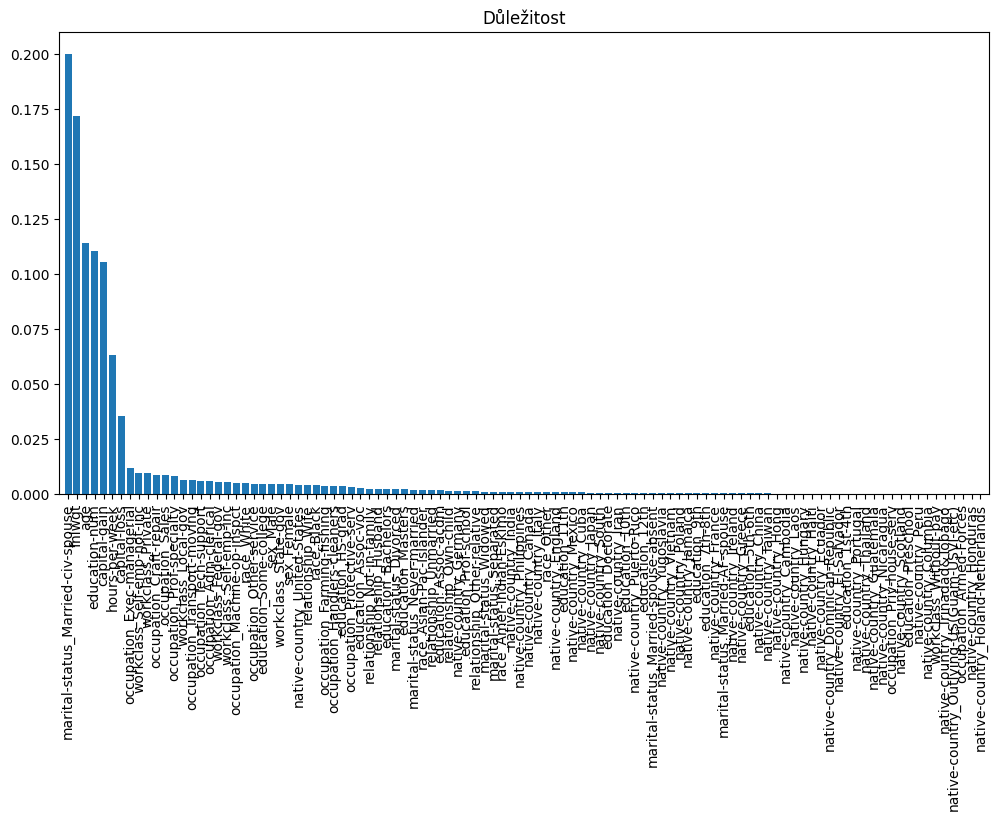

In [130]:
# Závislosti pro mojí target proměnnou
# - pomocí RFR - importance

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(30))

plt.figure(figsize=(12, 6))
plt.title("Důležitost")
plt.bar(range(X.shape[1]), feature_importance_df['Importance'], align="center")
plt.xticks(range(X.shape[1]), feature_importance_df['Feature'], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
#Vykreslení závislostí

In [ ]:
# Škálování

In [124]:
# přidat pro jednotlivé sloupce - vizualizaci s mojí cílovou proměnnou - barplot plot/scatter plot
